In [1]:
# Import required libraries
from scipy import signal
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# Randomly generate original sources
np.random.seed(123)

samples = 2000
time = np.linspace(0, 10, samples)

signal_1 = np.cos(2*time)
signal_2 = signal.sawtooth(3*np.pi*time) 

S = np.c_[signal_1, signal_2]

In [3]:
# Specify mixing matrix and compute mixed signals
A = np.array([[0.5, 3], [0.25, 2]])
X = np.dot(S, A.T)

In [4]:
# Create a FastICA model
ica = FastICA(n_components=2)

In [5]:
# Fit and transform the mixed signals using the FastICA model
S_ = ica.fit_transform(X)

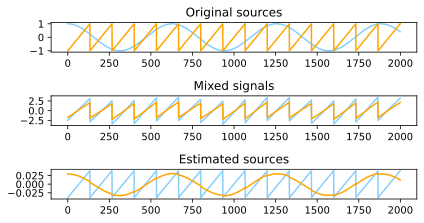

In [11]:
# Graph the original sources, mixed, signals, estimated sources
graphs = [S, X, S_]
titles = [
    'Original sources',
    'Mixed signals',
    'Estimated sources',
]
colors = ["lightskyblue", "orange"]
#colors = ["orange","lightskyblue"]

for ii, (graph, title) in enumerate(zip(graphs, titles), 1):
    plt.subplot(4, 1, ii)
    plt.title(title)
    for sig, color in zip(graph.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()

In [7]:
# Display the estimated mixing matrix
ica.mixing_

array([[77.09954466, 16.65629545],
       [51.46559122,  8.45078159]])

In [8]:
# Display the unmixing matrix
ica.components_

array([[-0.0410881 ,  0.08098369],
       [ 0.25022813, -0.37486162]])

In [9]:
# Display the whitening matrix
ica.whitening_

array([[-0.00882485, -0.00583219],
       [-0.25342548,  0.38346523]])